In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as plt
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 500)

In [6]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [7]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
train_df.info()
print('\n'+'-'*50+'\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

## Exploration Data Analysis
Let's start and explore target variable first

In [12]:
TARGET_NAME = 'Survived'
BASE_FEATURE_NAMES = train_df.columns.drop([TARGET_NAME, 'PassengerId']).tolist()

train_df[TARGET_NAME].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Our sample is well-balanced - good for us! There're enough examples of ones and zeros here to make accurate prediction.

### Correlation with target variable

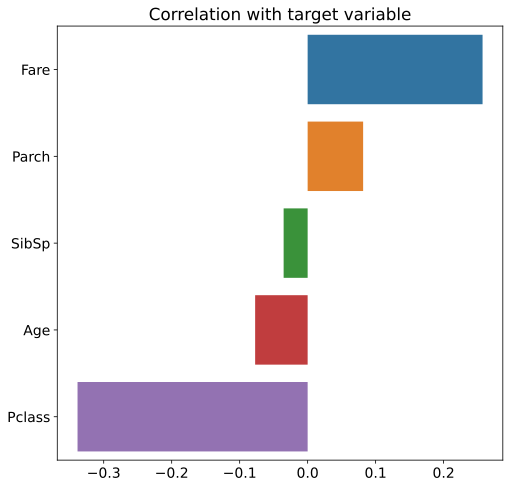

In [ ]:
corr_with_target = train_df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(8, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Seems that "Pclass" and "Fare" features have the greatest impact on survival chances. But they are actually look like total opposites.

In [ ]:
np.corrcoef(train_df['Pclass'], train_df['Fare'])

array([[ 1.        , -0.54949962],
       [-0.54949962,  1.        ]])

So, actually they are not. Correlation here is not strong, but it obviously exists. Let's continue our investigation.

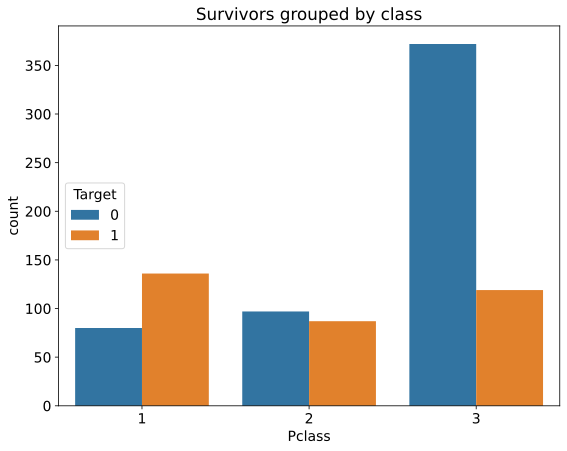

In [ ]:
plt.figure(figsize=(9, 7))

sns.countplot(x="Pclass", hue=TARGET_NAME, data=train_df)
plt.title('Survivors grouped by class')
plt.legend(title='Target', loc='center left')

plt.show()

Best chances to survive in 1st class and worst in 3rd. But gender also matters.

In [ ]:
men = train_df.loc[train_df.Sex == 'male'][TARGET_NAME]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
women = train_df.loc[train_df.Sex == 'female'][TARGET_NAME]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


<Figure size 648x504 with 0 Axes>

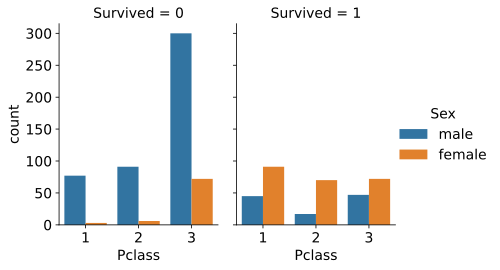

In [ ]:
plt.figure(figsize=(9, 7))

sns.catplot(x="Pclass", hue='Sex', data=train_df, col=TARGET_NAME, kind="count", height=4, aspect=.7)

plt.show()

Let's take another look at this data considering not only passangers 'Sex', but who was treated like a child.

In [ ]:
train_df['Sex_adulthood'] = None
train_df.loc[train_df['Age'] <= 14, 'Sex_adulthood'] = 'child'
train_df.loc[((train_df['Age'] > 14) | (train_df['Age'] == None)) & (train_df['Sex'] == 'male'), 'Sex_adulthood'] = 'male'
train_df.loc[((train_df['Age'] > 14) | (train_df['Age'] == None)) & (train_df['Sex'] == 'female'), 'Sex_adulthood'] = 'female'

test_df['Sex_adulthood'] = None
test_df.loc[train_df['Age'] <= 14, 'Sex_adulthood'] = 'child'
test_df.loc[((train_df['Age'] > 14) | (test_df['Age'] == None)) & (test_df['Sex'] == 'male'), 'Sex_adulthood'] = 'male'
test_df.loc[((train_df['Age'] > 14) | (test_df['Age'] == None)) & (test_df['Sex'] == 'female'), 'Sex_adulthood'] = 'female'

<Figure size 648x504 with 0 Axes>

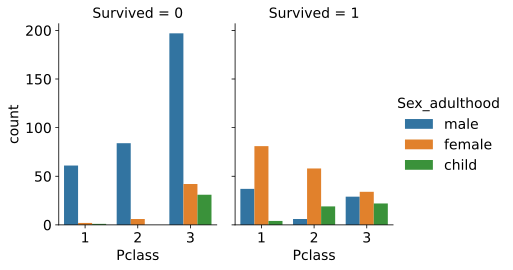

In [ ]:
plt.figure(figsize=(9, 7))

sns.catplot(x="Pclass", hue='Sex_adulthood', data=train_df, col=TARGET_NAME, kind="count", height=4, aspect=.7)

plt.show()

Consequence of the application of the principle “Women and children first”.

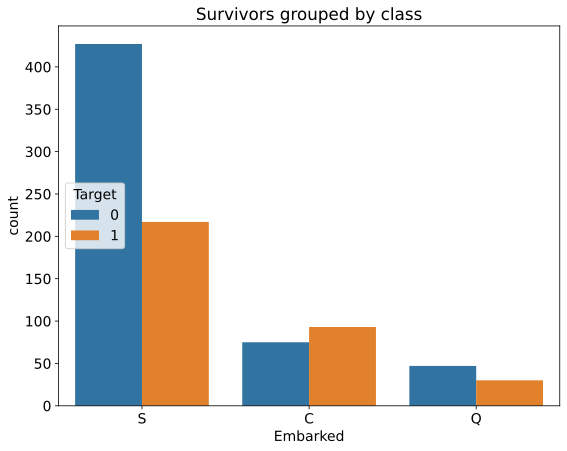

In [ ]:
plt.figure(figsize=(9, 7))

sns.countplot(x="Embarked", hue=TARGET_NAME, data=train_df)
plt.title('Survivors grouped by class')
plt.legend(title='Target', loc='center left')

plt.show()

There's possible correlation between port of embarkation and chance to survive, but correlation does not necessarily mean causality.

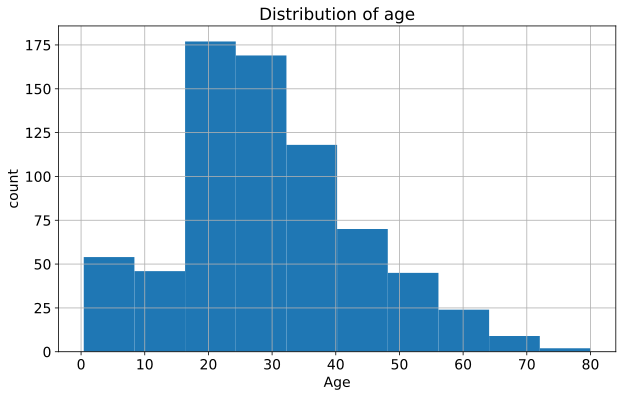

In [ ]:
plt.figure(figsize = (10, 6))

plt.plot()
train_df['Age'].hist()
plt.ylabel('count')
plt.xlabel('Age')

plt.title('Distribution of age')
plt.show()

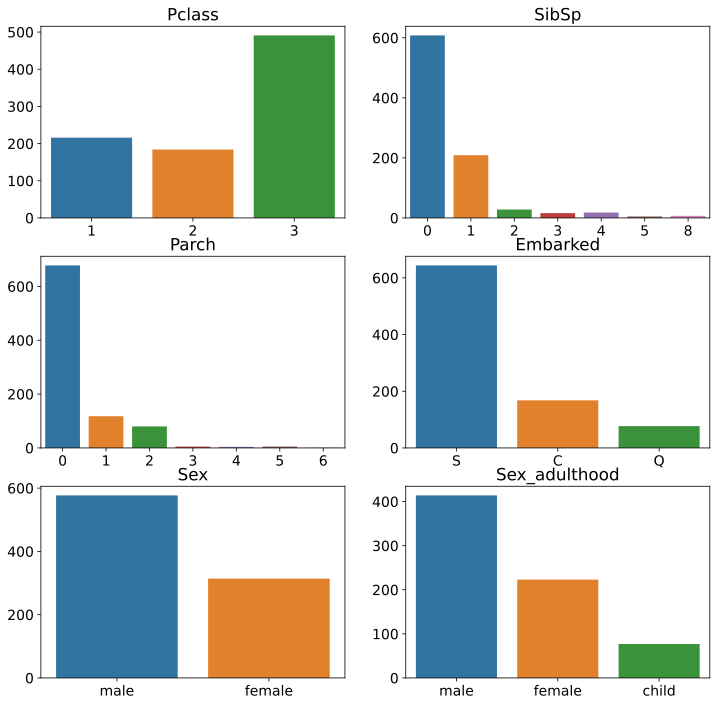

In [ ]:
train_df_bin_features = train_df[['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex', 'Sex_adulthood']]
plt.figure(figsize = (12,12))

for i, colname in enumerate(train_df_bin_features.columns):
    counts = train_df_bin_features[colname].value_counts()
    # normalize=True - для доли
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()